# I. 데이터 전처리

In [1]:
# 사용 라이브러리 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
rc('font', family='MalgunGothic')

In [3]:
art_df = pd.read_csv("./2023빅콘테스트_정형데이터분석분야_어드밴스드리그_데이터셋/2023빅콘테스트_어드밴스드리그_예술의전당.csv")

In [4]:
# 칼럼명 한글로 변경 
art_df.columns=['나이', '성별', '멤버십유형1', '멤버십유형2', '멤버십유형3', '멤버십유형4', '멤버십유형5', '멤버십유형6',
            '예매 거래일자', '예매 거래시간', '공연날짜', '공연시작시간', '좌석번호', '최종예매가격', '예매취소여부', '할인내역', '공연명 코드',
            '선예매시작일', '예매시작일', '장르', '공연장소', '러닝타임', '휴게시간', '회원여부']

In [5]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{: .3f}'.format 

In [6]:
art_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,멤버십유형6,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부
0,50.000,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,20211009,2000,1층 7열 5,0,0,초대권,1120,NaN,20210823.000,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,20221105,2000,1층 C블록 16열 3,0,0,초대권,2283,20220911.000,20220911.000,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,20190731,2000,1층 2열 3,0,0,초대권,2798,NaN,20190701.000,독주,리사이틀홀,90,15,N
4,50.000,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y


## 1. 공연장소를 콘서트홀로 한정
- '콘서트홀'의 좌석을 재그룹핑 후 가격을 예측할 것이기 때문에 공연장소가 콘서트홀인 행만 추출하여 concert_df 데이터프레임을 생성한다

In [7]:
concert_df = art_df[art_df['공연장소']=='콘서트홀']
concert_df.reset_index(drop=True,  inplace=True)
concert_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,멤버십유형6,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부
0,50.000,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y
1,50.000,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y
2,30.000,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,20191109,1700,3층 E블록4열 8,0,0,초대권,44,NaN,20191023.000,교향곡,콘서트홀,100,15,N
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,20190723,2000,2층 D블록8열 4,0,0,초대권,827,20190602.000,20190602.000,교향곡,콘서트홀,120,20,N


## 2. 멤버십유형6 열 제거
- 멤버십유형6은 모두 결측치이므로 열을 삭제한다.

In [8]:
concert_df.drop(['멤버십유형6'], axis=1, inplace=True)
concert_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,20191109,1700,3층 E블록4열 8,0,0,초대권,44,NaN,20191023.000,교향곡,콘서트홀,100,15,N
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,20190723,2000,2층 D블록8열 4,0,0,초대권,827,20190602.000,20190602.000,교향곡,콘서트홀,120,20,N


## 3. 공연진행석 
- 공연진행석을 확인해 본 결과, 공연에 따라 유료판매가 되고 있지만, 약 9700개의 예매 내역 중 약 7000개의 예매 내역이 공연진행석 명목으로 무료로 진행되었다. 따라서, 공연진행석은 별도의 등급을 두어 관리한다. 

In [9]:
#공연진행석 리스트 생성
perf_lst=['1층 A블록15열 9', '1층 A블록15열 10', '1층 A블록15열 11', '1층 A블록15열 12',
         '1층 B블록15열 12', '1층 B블록15열 13', '1층 C블록13열 1', '1층 C블록13열 2', '1층 C블록13열 3', '1층 C블록13열 4'
         '1층 C블록13열 5', '1층 C블록13열 6', '1층 C블록7열 1', '1층 C블록7열 2', '1층 C블록7열 12', '1층 C블록7열 13']

In [10]:
#공연진행석 예매내역 중 할인내역이 공연진행석이면서 최종예매가격이 0인 행의 개수
concert_df[(concert_df['좌석번호'].isin(perf_lst))&(concert_df['할인내역']=='공연진행석')&(concert_df['최종예매가격']==0)]['최종예매가격'].count()

6843

In [11]:
#공연진행석 데이터프레임 별도로 생성 및 기존 데이터프레임에서 제외
perf_run_df=concert_df[concert_df['좌석번호'].isin(perf_lst)]
concert_df=concert_df[~concert_df['좌석번호'].isin(perf_lst)]
perf_run_df.reset_index(inplace=True, drop=True)
concert_df.reset_index(inplace=True, drop=True)

In [12]:
print(perf_run_df)
print(concert_df)

      나이   성별 멤버십유형1 멤버십유형2 멤버십유형3 멤버십유형4 멤버십유형5   예매 거래일자  예매 거래시간      공연날짜  \
0    NaN  NaN    NaN    NaN    NaN    NaN    NaN  20211129     2050  20211228   
1    NaN  NaN    NaN    NaN    NaN    NaN    NaN  20210530     2151  20210615   
2    NaN  NaN    NaN    NaN    NaN    NaN    NaN  20190814     2054  20190904   
3    NaN  NaN    NaN    NaN    NaN    NaN    NaN  20230322     2108  20230428   
4    NaN  NaN    NaN    NaN    NaN    NaN    NaN  20230507     2134  20230530   
...   ..  ...    ...    ...    ...    ...    ...       ...      ...       ...   
9698 NaN  NaN    NaN    NaN    NaN    NaN    NaN  20220624     1538  20220727   
9699 NaN  NaN    NaN    NaN    NaN    NaN    NaN  20210207     1551  20210211   
9700 NaN  NaN    NaN    NaN    NaN    NaN    NaN  20230215     1520  20230310   
9701 NaN  NaN    NaN    NaN    NaN    NaN    NaN  20190819     1253  20191009   
9702 NaN  NaN    NaN    NaN    NaN    NaN    NaN  20220311     1530  20220318   

      공연시작시간          좌석번호 

## 4. 최종예매가격이 0인 데이터 처리
- 최종예매가격이 0인 행의 할인내역을 보면, 대부분 외부 프로모션으로 예매된 할인 티켓임을 확인할 수 있다.
- 가격이 0인 데이터는 대부분의 고객 정보 및 멤버쉽 정보를 확인할 수 없다.
- 클래식 공연 활성화를 위한 정책을 위해서는 티켓의 가격이 반영된 내부 예매 데이터가 가장 유의미하다. 따라서 티켓 가격이 0이 아닌 데이터를 추출하여 분석을 진행한다

In [13]:
#최종예매가격이 0인 행의 할인내역 확인
concert_df[concert_df['최종예매가격']==0]['할인내역'].value_counts().to_frame()

,할인내역
초대권,387739
기획사판매,137153
기획사,9507
한화초대석,6767
홍보진행,6029
공연진행석,5664
정기회원,5310
우리카드 우수회원,2998
신세계석,2560
한화생명,2213


In [14]:
#가격이 0인 행 데이터 확인
concert_df[concert_df['최종예매가격']==0].isnull().sum().to_frame()

,0
나이,570841
성별,570841
멤버십유형1,570841
멤버십유형2,570842
멤버십유형3,570842
멤버십유형4,570846
멤버십유형5,570846
예매 거래일자,0
예매 거래시간,0
공연날짜,0


In [15]:
#최종예매가격이 0이 아닌 concert_nz_df 데이터프레임 생성
concert_nz_df=concert_df[concert_df['최종예매가격']!=0]
concert_nz_df.reset_index(inplace=True, drop =True)
concert_nz_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y
3,NaN,F,블루,무료,NaN,NaN,NaN,20190703,908,20190721,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.000,클래식,콘서트홀,100,15,N
4,50.000,F,무료,NaN,NaN,NaN,NaN,20191005,1417,20191201,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.000,오페라,콘서트홀,120,15,Y


## 5. 할인전가격 열 추가
- 최종예매가격은 할인이 되고 난 후의 가격이므로, 할인 이전 가격인 '할인전가격' 열을 추가한다.

In [16]:
#할인내역을 바탕으로 할인 전 가격으로 복구
for i in range(len(concert_nz_df)):
    if '%' in concert_nz_df.loc[i, '할인내역']:
        if concert_nz_df.loc[i, '할인내역'][-3:-1].isnumeric():
            concert_nz_df.loc[i,'할인전가격']=concert_nz_df.loc[i, '최종예매가격']/(100-int(concert_nz_df.loc[i, '할인내역'][-3:-1])) * 100
        elif concert_nz_df.loc[i,'할인내역'][-1]=='%':
            concert_nz_df.loc[i, '할인전가격']=concert_nz_df.loc[i, '최종예매가격']/(100-int(concert_nz_df.loc[i, '할인내역'][-2])) * 100
        else:
            concert_nz_df.loc[i, '할인전가격']=concert_nz_df.loc[i, '최종예매가격']/(100-int(concert_nz_df.loc[i, '할인내역'][-4:-2])) * 100
    else :
        concert_nz_df.loc[i, '할인전가격']=concert_nz_df.loc[i, '최종예매가격']
    #elif concert_nz_df.loc[i, '할인내역']=='일반':
        #concert_nz_df.loc[i, '할인전가격']=concert_nz_df.loc[i, '최종예매가격']
    
concert_nz_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부,할인전가격
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y,10000.000
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y,180000.000
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y,180000.000
3,NaN,F,블루,무료,NaN,NaN,NaN,20190703,908,20190721,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.000,클래식,콘서트홀,100,15,N,75000.000
4,50.000,F,무료,NaN,NaN,NaN,NaN,20191005,1417,20191201,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.000,오페라,콘서트홀,120,15,Y,30000.000


## 6. 할인전가격 이상치 처리

findfont: Font family ['MalgunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['MalgunGothic'] not found. Falling back to DejaVu Sans.


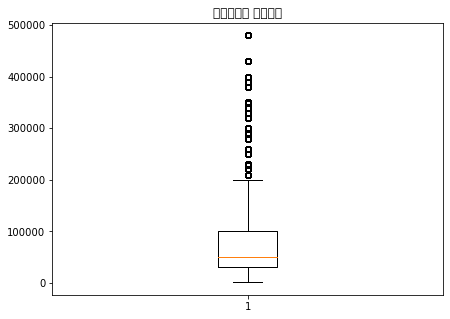

In [17]:
plt.figure(figsize=(7, 5))
plt.boxplot(concert_nz_df['할인전가격'])
plt.rc('font', family='NanumGothic')
plt.title('할인전가격 박스플롯')
plt.show()

In [18]:
#이상치 처리 기준 구하기
Q1 = concert_nz_df['할인전가격'].quantile(.25)
Q3 = concert_nz_df['할인전가격'].quantile(.75)
IQR = Q3 - Q1
Q2 = concert_nz_df['할인전가격'].quantile(.5)
Q4 = concert_nz_df['할인전가격'].quantile(1)

outlier=Q3+1.5*IQR
outlier

205000.0

In [19]:
concert_nz_df=concert_nz_df[concert_nz_df['할인전가격']<=205000]
concert_nz_df.reset_index(inplace=True, drop =True)
concert_nz_df

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부,할인전가격
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y,10000.000
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y,180000.000
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y,180000.000
3,NaN,F,블루,무료,NaN,NaN,NaN,20190703,908,20190721,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.000,클래식,콘서트홀,100,15,N,75000.000
4,50.000,F,무료,NaN,NaN,NaN,NaN,20191005,1417,20191201,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.000,오페라,콘서트홀,120,15,Y,30000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498077,60.000,F,골드,무료,NaN,NaN,NaN,20181223,1227,20190531,2000,3층 N블록1열 8,10000,0,일반,282,NaN,20181202.000,교향곡,콘서트홀,120,15,Y,10000.000
498078,30.000,F,무료,NaN,NaN,NaN,NaN,20230516,1743,20230603,1700,3층 D블록6열 6,40000,0,일반,1666,20230317.000,20230318.000,실내악,콘서트홀,85,15,Y,40000.000
498079,60.000,F,무료,그린,NaN,NaN,NaN,20210618,1509,20210704,1500,1층 A블록2열 2,90000,2,일반,887,20210618.000,20210620.000,교향곡,콘서트홀,110,20,Y,90000.000
498080,50.000,M,무료,NaN,NaN,NaN,NaN,20230522,1729,20230613,1700,3층 A블록6열 4,10000,0,일반,2825,20230505.000,20230507.000,교향곡,콘서트홀,120,15,Y,10000.000


## 7. 공연요일 & 주중/주말 열 추가
- 공연날짜를 기반으로 공연요일별 차이를 찾기 위해 '공연요일'과 주중/주말 열을 추가한다.

In [20]:
#공연요일 열 추가
concert_nz_df['공연날짜'] = pd.to_datetime(concert_nz_df['공연날짜'], format='%Y%m%d')
concert_nz_df['공연요일'] = concert_nz_df['공연날짜'].dt.day_name()

concert_nz_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부,할인전가격,공연요일
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,2022-02-04,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y,10000.000,Friday
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y,180000.000,Wednesday
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,2019-03-23,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y,180000.000,Saturday
3,NaN,F,블루,무료,NaN,NaN,NaN,20190703,908,2019-07-21,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.000,클래식,콘서트홀,100,15,N,75000.000,Sunday
4,50.000,F,무료,NaN,NaN,NaN,NaN,20191005,1417,2019-12-01,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.000,오페라,콘서트홀,120,15,Y,30000.000,Sunday


In [21]:
#주중/주말 열 추가, 주중(화,수,목,금) = 0, 주말(토,일) =5 
concert_nz_df['주중/주말']=0
weekday=['Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend=['Saturday', 'Sunday']
for i in range(len(concert_nz_df)):
    for j in range(len(weekend)):
        if concert_nz_df.loc[i, '공연요일']==weekend[j]:
            concert_nz_df.loc[i, '주중/주말']=5

In [22]:
concert_nz_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부,할인전가격,공연요일,주중/주말
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,2022-02-04,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y,10000.000,Friday,0
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y,180000.000,Wednesday,0
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,2019-03-23,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y,180000.000,Saturday,5
3,NaN,F,블루,무료,NaN,NaN,NaN,20190703,908,2019-07-21,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.000,클래식,콘서트홀,100,15,N,75000.000,Sunday,5
4,50.000,F,무료,NaN,NaN,NaN,NaN,20191005,1417,2019-12-01,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.000,오페라,콘서트홀,120,15,Y,30000.000,Sunday,5


## 8. 오전/오후 열 추가
- 공연시작시간을 오전, 오후로 나누어 살펴보기 위해, 공연시작시간이 오전이면 0, 공연시작시간이 오후이면 2로 태깅해준다.

In [23]:
concert_nz_df['공연시작시간'].value_counts().to_frame()

,공연시작시간
1930,180155
1700,177528
2000,116320
1100,20148
1500,1265
1900,1187
1400,1143
1630,214
1800,122


In [24]:
#오전/오후 열 추가, 오전(10시~16시 30분) = 0, 오후(17시~20시) = 5
concert_nz_df['오전/오후']=0
early = [1000, 1100, 1400, 1500, 1630]
late = [1700, 1800, 1900, 1930, 2000]
for i in range(len(concert_nz_df)):
    for j in range(len(early)):
        if concert_nz_df.loc[i, '공연시작시간']==late[j]:
            concert_nz_df.loc[i, '오전/오후']=5

In [25]:
concert_nz_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부,할인전가격,공연요일,주중/주말,오전/오후
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,2022-02-04,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y,10000.000,Friday,0,5
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y,180000.000,Wednesday,0,5
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,2019-03-23,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y,180000.000,Saturday,5,5
3,NaN,F,블루,무료,NaN,NaN,NaN,20190703,908,2019-07-21,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.000,클래식,콘서트홀,100,15,N,75000.000,Sunday,5,5
4,50.000,F,무료,NaN,NaN,NaN,NaN,20191005,1417,2019-12-01,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.000,오페라,콘서트홀,120,15,Y,30000.000,Sunday,5,5


## 9. 좌석별 예매횟수 열 추가
- 좌석의 수요를 파악하기 위해 좌석별 예매횟수를 구하여 데이터프레임에 추가한다.

In [26]:
concert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087265 entries, 0 to 1087264
Data columns (total 23 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   나이       483358 non-null   float64
 1   성별       483706 non-null   object 
 2   멤버십유형1   483706 non-null   object 
 3   멤버십유형2   388704 non-null   object 
 4   멤버십유형3   139981 non-null   object 
 5   멤버십유형4   25047 non-null    object 
 6   멤버십유형5   1106 non-null     object 
 7   예매 거래일자  1087265 non-null  int64  
 8   예매 거래시간  1087265 non-null  int64  
 9   공연날짜     1087265 non-null  int64  
 10  공연시작시간   1087265 non-null  int64  
 11  좌석번호     1087265 non-null  object 
 12  최종예매가격   1087265 non-null  int64  
 13  예매취소여부   1087265 non-null  int64  
 14  할인내역     1087265 non-null  object 
 15  공연명 코드   1087265 non-null  int64  
 16  선예매시작일   695197 non-null   float64
 17  예매시작일    1087265 non-null  float64
 18  장르       1062375 non-null  object 
 19  공연장소     1087265 non-null  object 
 20  러닝

In [27]:
#좌석번호별 예매횟수 구하기
reserve_num=concert_df[['회원여부', '좌석번호']].groupby('좌석번호').count()
reserve_num.reset_index(inplace = True)
reserve_num.rename(columns={'회원여부':'예매횟수'}, inplace=True)
reserve_num

,좌석번호,예매횟수
0,1층 A블록10열 1,367
1,1층 A블록10열 10,565
2,1층 A블록10열 11,540
3,1층 A블록10열 2,402
4,1층 A블록10열 3,373
...,...,...
2490,합창석 H블록4열 5,209
2491,합창석 H블록4열 6,207
2492,합창석 H블록4열 7,194
2493,합창석 H블록4열 8,224


In [28]:
# 좌석별 예매횟수 데이터와 병합
concert_nz_df = pd.merge(concert_nz_df, reserve_num, on='좌석번호', how='left')

In [29]:
concert_nz_df['예매횟수'].value_counts()

496    3565
497    3404
510    3209
463    3201
466    3185
       ... 
37       13
36       13
24        7
6         6
720       2
Name: 예매횟수, Length: 523, dtype: int64

In [30]:
concert_nz_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부,할인전가격,공연요일,주중/주말,오전/오후,예매횟수
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,2022-02-04,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y,10000.000,Friday,0,5,340
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y,180000.000,Wednesday,0,5,435
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,2019-03-23,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y,180000.000,Saturday,5,5,317
3,NaN,F,블루,무료,NaN,NaN,NaN,20190703,908,2019-07-21,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.000,클래식,콘서트홀,100,15,N,75000.000,Sunday,5,5,527
4,50.000,F,무료,NaN,NaN,NaN,NaN,20191005,1417,2019-12-01,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.000,오페라,콘서트홀,120,15,Y,30000.000,Sunday,5,5,396


## 10. 시야 열 추가
- 좌석과 무대 사이의 거리, 블록의 위치, 음향 크기 정도를 수치화하고, 이를 합쳐 고객의 ‘시야’라는 새로운 변수를 생성
- 1. 좌석과 무대 사이의 거리(음향 크기와 비례)
- 2. 시야 -> 기존 좌석 등급 활용(시야에 따라 좌석 등급이 잘 나눠져 있다고 판단)

In [31]:
concert_nz_df['시야'] = "" # 빈 칼럼 생성

# R석 1층 B블록
for i in range(3, 19):  # 3열부터 18열까지 반복
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'1층 B블록{i}열'), '시야'] = 'R'

# R석 1층 C블록
for i in range(3, 19):  
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'1층 C블록{i}열'), '시야'] = 'R'

# R석 1층 D블록
for i in range(3, 19): 
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'1층 D블록{i}열'), '시야'] = 'R'
    
# R석 2층 B블록
for i in range(1, 4): 
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'2층 B블록{i}열'), '시야'] = 'R'

# R석 2층 C블록
for i in range(1, 4):  
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'2층 C블록{i}열'), '시야'] = 'R'
    
# R석 2층 D블록
for i in range(1, 4):  
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'2층 D블록{i}열'), '시야'] = 'R'

In [32]:
# S석 1층 A블록
for i in range(3, 19):  
    # 해당 열의 unique한 좌석번호들을 오름차순으로 정렬
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    # 맨 오른쪽의 두 좌석을 찾음
    last_two_seats = sorted_unique_seats[-2:]
    
    # 해당 좌석의 '시야' 칼럼 값을 'S'로 변경
    for seat in last_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'S'
        
# S석 1층 B블록
for i in range(19, 21):  
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'1층 B블록{i}열'), '시야'] = 'S'

# S석 1층 C블록
for i in range(19, 21):  
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'1층 C블록{i}열'), '시야'] = 'S'

# S석 1층 D블록
for i in range(19, 21):  
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'1층 D블록{i}열'), '시야'] = 'S'

# S석 1층 E블록
for i in range(3, 19):      
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[:2]
   
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'S'

# S석 2층 A블록
for i in range(1, 3):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 A블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    last_two_seats = sorted_unique_seats[-10:]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'S'
        
# S석 2층 B블록
for i in range(4, 6): 
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'2층 B블록{i}열'), '시야'] = 'S'

# S석 2층 C블록
for i in range(4, 6):  
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'2층 C블록{i}열'), '시야'] = 'S'

# S석 2층 D블록
for i in range(4, 6): 
    concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains(f'2층 D블록{i}열'), '시야'] = 'S'

# S석 2층 E블록
for i in range(1, 3):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 E블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[:10]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'S'

In [33]:
# C석 3층
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('3층'), '시야'] = 'C'

In [34]:
# B석 합창석
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('합창석'), '시야'] = 'B'

# B석 1층 A블록 
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('1층 A블록1열'), '시야'] = 'B'
for i in range(2, 4): 
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[:3]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

for i in range(4, 8): 
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[:2]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'
        
for i in range(8, 12):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[:3]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

for i in range(12, 16): 
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[:4]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

for i in range(16, 18):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[:3]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록18열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[:2]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'
    
unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록19열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[:3]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록20열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[:2]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 A블록21열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[:3]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('1층 A블록22열'), '시야'] = 'B'

# B석 1층 E블록 
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('1층 E블록1열'), '시야'] = 'B'
for i in range(2, 4):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    # 맨 오른쪽의 세 좌석을 찾음
    first_two_seats = sorted_unique_seats[-3:]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

for i in range(4, 8):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[-2:]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'
        
for i in range(8, 12):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[-3:]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

for i in range(12, 16):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[-4:]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

for i in range(16, 18):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[-3:]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록18열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[-2:]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'
    
unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록19열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[-3:]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록20열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[-2:]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'1층 E블록21열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[-3:]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('1층 E블록22열'), '시야'] = 'B'

# B석 2층 BOX
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('3층 BOX'), '시야'] = 'B'

# B석 2층 A구역
for i in range(1, 3): 
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 A블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[:3]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'
        
unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 A블록3열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[:4]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 A블록4열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[:5]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 A블록5열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[:6]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 A블록6열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[:5]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('2층 A블록7열'), '시야'] = 'B'
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('2층 A블록8열'), '시야'] = 'B'

# B석 2층 E구역
for i in range(1, 3):  
    unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 E블록{i}열')]['좌석번호'].unique()
    sorted_unique_seats = sorted(unique_seats)
    
    first_two_seats = sorted_unique_seats[-3:]
    
    for seat in first_two_seats:
        concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'
        
unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 E블록3열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[-4:]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 E블록4열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[-5:]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 E블록5열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[-6:]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

unique_seats = concert_nz_df[concert_nz_df['좌석번호'].str.contains(f'2층 E블록6열')]['좌석번호'].unique()
sorted_unique_seats = sorted(unique_seats)
    
first_two_seats = sorted_unique_seats[-5:]
    
for seat in first_two_seats:
    concert_nz_df.loc[concert_nz_df['좌석번호'] == seat, '시야'] = 'B'

concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('2층 E블록7열'), '시야'] = 'B'
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('2층 E블록8열'), '시야'] = 'B'

# B석 3층 BOX
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('3층 BOX'), '시야'] = 'B'

# B석 3층 B블록
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('3층 B블록4열'), '시야'] = 'B'
# B석 3층 C블록
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('3층 C블록4열'), '시야'] = 'B'
# B석 3층 D블록
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('3층 D블록4열'), '시야'] = 'B'
# B석 3층 E블록
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('3층 E블록4열'), '시야'] = 'B'
# B석 3층 F블록
concert_nz_df.loc[concert_nz_df['좌석번호'].str.contains('3층 F블록4열'), '시야'] = 'B'

In [35]:
# 나머지 A등급으로
concert_nz_df['시야'].replace("", 'A', inplace=True)

## 11. 충성도 열 추가
- 멤버십유형 1~5까지의 열을 합하기 위해, 각 멤버십유형의 연회비를 합하여 '충성도'라는 열을 추가한다.

In [36]:
concert_nz_df['충성도']=0
for i in range(len(concert_nz_df)):
    for j in range(1,6):
        if concert_nz_df.loc[i, '멤버십유형%d'%j]=='골드':
            concert_nz_df.loc[i, '충성도']+=10
        if concert_nz_df.loc[i, '멤버십유형%d'%j]=='블루':
            concert_nz_df.loc[i, '충성도']+=4
        if concert_nz_df.loc[i, '멤버십유형%d'%j]=='그린':
            concert_nz_df.loc[i, '충성도']+=2

## 12. 러닝타임이 0인 결측치 처리
- 공연명 코드가 없는 경우, 예술의 전당 캘린더를 참고하여 결측치를 처리한다.

In [37]:
#러닝타임 0인 행의 공연명 코드 확인
concert_nz_df[concert_nz_df['러닝타임']==0]['공연명 코드'].value_counts()

552     1236
2495     911
2217     104
Name: 공연명 코드, dtype: int64

In [38]:
#공연명코드별 러닝타임 확인
print(concert_nz_df[concert_nz_df['공연명 코드']==552]['러닝타임'].value_counts())
print(concert_nz_df[concert_nz_df['공연명 코드']==2217]['러닝타임'].value_counts())
print(concert_nz_df[concert_nz_df['공연명 코드']==2495]['러닝타임'].value_counts())

0      1236
140    1098
Name: 러닝타임, dtype: int64
0    104
Name: 러닝타임, dtype: int64
0    911
Name: 러닝타임, dtype: int64


In [39]:
#러닝타임 결측치 처리
#공연명 코드 552
list_552 = concert_nz_df[concert_nz_df['공연명 코드']==552].index.to_list()
for i in list_552:
    concert_nz_df.loc[i, '러닝타임']=140

#공연명 코드 2217
#뉴서울필하모닉 창단 28주년 기념 정기연주회 120분
list_2217 = concert_nz_df[concert_nz_df['공연명 코드']==2217].index.to_list()
for i in list_2217:
    concert_nz_df.loc[i, '러닝타임']=120
    
#공연명 코드 2495
#서울모테트합창단 창단 30주년 기념 마스터피스 시리즈 VI 바흐의 크리스마스 오라토리오 180분
list_2495 = concert_nz_df[concert_nz_df['공연명 코드']==2495].index.to_list()
for i in list_2495:
    concert_nz_df.loc[i, '러닝타임']=180
    
concert_nz_df['러닝타임'].isnull().sum()

0

In [40]:
concert_nz_df.head()

,나이,성별,멤버십유형1,멤버십유형2,멤버십유형3,멤버십유형4,멤버십유형5,예매 거래일자,예매 거래시간,공연날짜,공연시작시간,좌석번호,최종예매가격,예매취소여부,할인내역,공연명 코드,선예매시작일,예매시작일,장르,공연장소,러닝타임,휴게시간,회원여부,할인전가격,공연요일,주중/주말,오전/오후,예매횟수,시야,충성도
0,50.000,F,골드,무료,그린,NaN,NaN,20220114,1512,2022-02-04,2000,3층 BOX9 10,10000,2,일반,302,20220114.000,20220115.000,교향곡,콘서트홀,120,15,Y,10000.000,Friday,0,5,340,B,12
1,50.000,M,무료,NaN,NaN,NaN,NaN,20220206,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,897,20220109.000,20220110.000,독주,콘서트홀,90,0,Y,180000.000,Wednesday,0,5,435,R,0
2,30.000,F,블루,무료,NaN,NaN,NaN,20181124,1145,2019-03-23,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.000,20181119.000,교향곡,콘서트홀,100,15,Y,180000.000,Saturday,5,5,317,B,4
3,NaN,F,블루,무료,NaN,NaN,NaN,20190703,908,2019-07-21,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.000,클래식,콘서트홀,100,15,N,75000.000,Sunday,5,5,527,R,4
4,50.000,F,무료,NaN,NaN,NaN,NaN,20191005,1417,2019-12-01,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.000,오페라,콘서트홀,120,15,Y,30000.000,Sunday,5,5,396,B,0


In [41]:
concert_nz_df.to_csv('빅콘_최종데이터_1.csv')

# II. EDA

## 1. 히트맵 생성

In [42]:
heatmap_df=concert_nz_df[['나이', '성별', '공연시작시간',
                          '최종예매가격', '예매취소여부',
                          '장르', '러닝타임', '휴게시간', '회원여부',
                          '할인전가격', '공연요일', '주중/주말', '오전/오후', '예매횟수', '시야', '충성도']]
heatmap_df.head()

,나이,성별,공연시작시간,최종예매가격,예매취소여부,장르,러닝타임,휴게시간,회원여부,할인전가격,공연요일,주중/주말,오전/오후,예매횟수,시야,충성도
0,50.000,F,2000,10000,2,교향곡,120,15,Y,10000.000,Friday,0,5,340,B,12
1,50.000,M,1930,180000,0,독주,90,0,Y,180000.000,Wednesday,0,5,435,R,0
2,30.000,F,2000,144000,2,교향곡,100,15,Y,180000.000,Saturday,5,5,317,B,4
3,NaN,F,1700,75000,0,클래식,100,15,N,75000.000,Sunday,5,5,527,R,4
4,50.000,F,1700,24000,0,오페라,120,15,Y,30000.000,Sunday,5,5,396,B,0


In [43]:
heatmap_df['성별']=heatmap_df['성별'].astype('category').cat.codes
heatmap_df['회원여부']=heatmap_df['회원여부'].astype('category').cat.codes
heatmap_df['장르']=heatmap_df['장르'].astype('category').cat.codes
heatmap_df['공연요일']=heatmap_df['공연요일'].astype('category').cat.codes
heatmap_df['시야']=heatmap_df['시야'].astype('category').cat.codes
heatmap_df.head()

,나이,성별,공연시작시간,최종예매가격,예매취소여부,장르,러닝타임,휴게시간,회원여부,할인전가격,공연요일,주중/주말,오전/오후,예매횟수,시야,충성도
0,50.000,0,2000,10000,2,1,120,15,1,10000.000,0,0,5,340,1,12
1,50.000,1,1930,180000,0,3,90,0,1,180000.000,5,0,5,435,3,0
2,30.000,0,2000,144000,2,1,100,15,1,180000.000,1,5,5,317,1,4
3,NaN,0,1700,75000,0,11,100,15,0,75000.000,2,5,5,527,3,4
4,50.000,0,1700,24000,0,7,120,15,1,30000.000,2,5,5,396,1,0


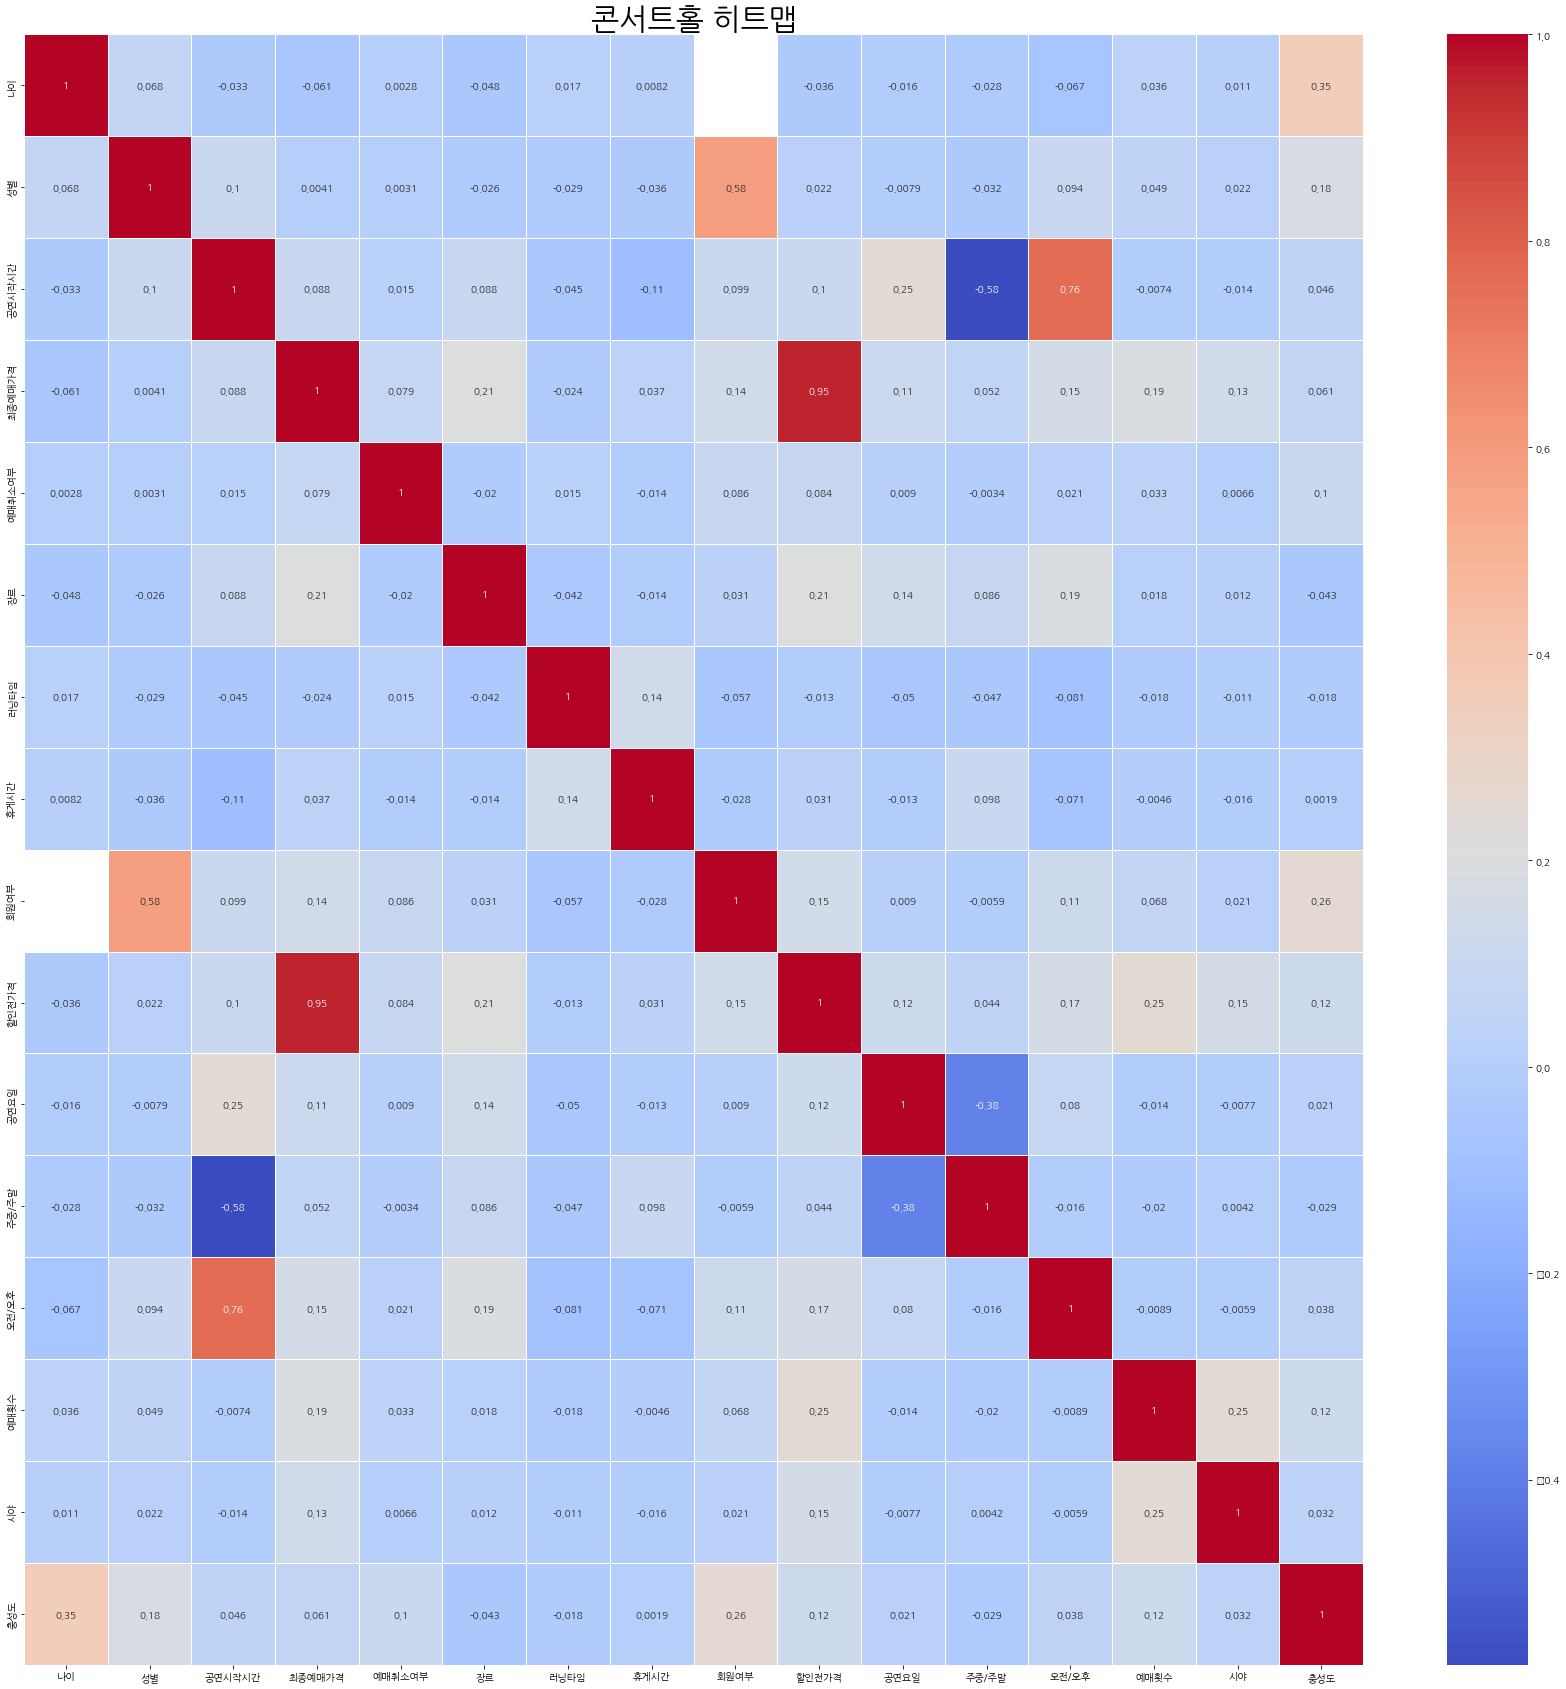

In [44]:
#히트맵 생성
plt.figure(figsize=(30, 30))  # 그림의 크기 설정 (선택 사항)
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('콘서트홀 히트맵', fontsize=30)
plt.show()

- 양(+)의 상관관계: 예매횟수와 할인전가격 0.25, 나이와 충성도 0.35, 성별과 회원여부 0.58
- 음(-)의 상관관계: 공연시작시간과 주중/주말 -0.58

## 2. 시간 요인(공연시작시간, 오전/오후, 공연요일, 주중/주말)

In [45]:
#공연요일별 매출액 합
공연요일_sales = concert_nz_df.groupby('공연요일')['할인전가격'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).to_frame()
공연요일_sales.reset_index(inplace=True)
공연요일_sales

,공연요일,할인전가격
0,Monday,NaN
1,Tuesday,5145660008.321
2,Wednesday,4723786646.936
3,Thursday,4698488392.892
4,Friday,4933375576.743
5,Saturday,6511122977.180
6,Sunday,6137503986.154


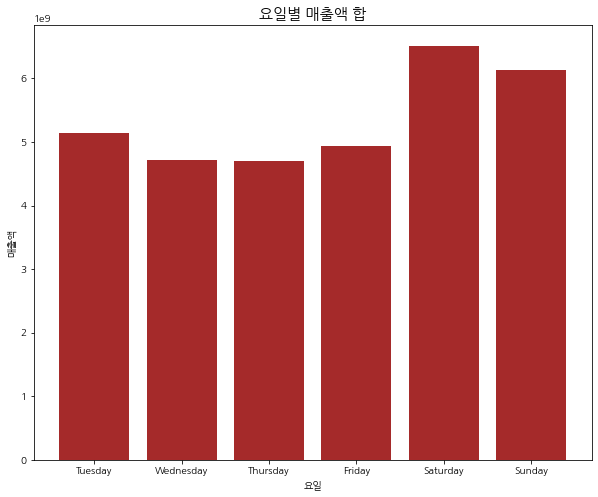

In [46]:
#요일별 매출액 합 막대그래프
공연요일_sales = concert_nz_df.groupby('공연요일')['할인전가격'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).to_frame()
공연요일_sales.reset_index(inplace=True)

plt.figure(figsize=(10, 8))
color='brown'
plt.bar(공연요일_sales['공연요일'], 공연요일_sales['할인전가격'], color = color)

# 그래프 제목과 축 레이블 설정
plt.title('요일별 매출액 합', fontsize=15)
plt.xlabel('요일')
plt.ylabel('매출액')

# 그래프 표시
plt.show()

In [47]:
concert_nz_df[['주중/주말', '할인전가격']].groupby('주중/주말').sum()

,할인전가격
주중/주말,
0,19501310624.891
5,12648626963.334


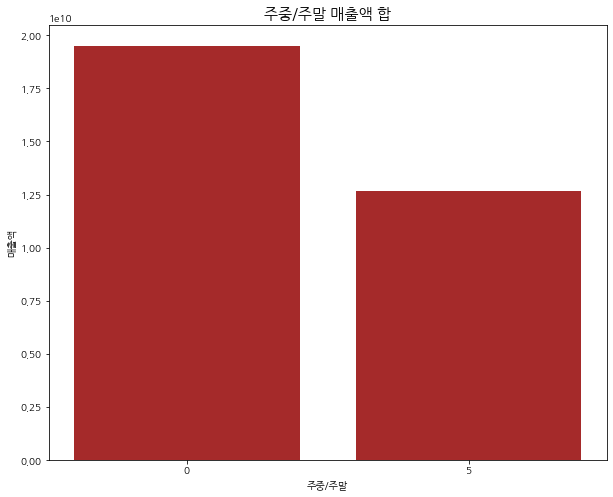

In [48]:
#주중/주말 매출액 합 막대그래프
day_end_sales = concert_nz_df.groupby('주중/주말')['할인전가격'].sum().to_frame()
day_end_sales.reset_index(inplace=True)

plt.figure(figsize=(10, 8))
color='brown'
plt.bar(day_end_sales['주중/주말'].astype('str'), day_end_sales['할인전가격'], color = color)

# 그래프 제목과 축 레이블 설정
plt.title('주중/주말 매출액 합', fontsize=15)
plt.xlabel('주중/주말')
plt.ylabel('매출액')

# 그래프 표시
plt.show()

In [49]:
#주중/주말별 공연시작시간 
start_time = concert_nz_df.groupby('주중/주말')['공연시작시간'].mean().to_frame()
start_time.reset_index(inplace=True)
start_time

,주중/주말,공연시작시간
0,0,1917.147
1,5,1682.276


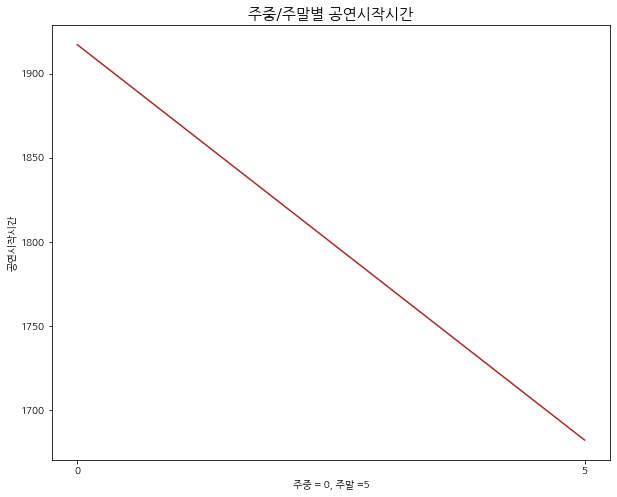

In [50]:
#주중/주말별 공연시작시간 선그래프
plt.figure(figsize=(10, 8))
color='brown'
sns.lineplot(start_time['주중/주말'].astype('str'), start_time['공연시작시간'], color = color)

# 그래프 제목과 축 레이블 설정
plt.title('주중/주말별 공연시작시간', fontsize=15)
plt.xlabel('주중 = 0, 주말 =5')
plt.ylabel('공연시작시간')

# 그래프 표시
plt.show()

## 3. 가격요인(할인전가격)

In [51]:
#예매횟수와 할인전가격 관계
concert_nz_df[['예매횟수', '할인전가격']].corr()

,예매횟수,할인전가격
예매횟수,1.000,0.250
할인전가격,0.250,1.000


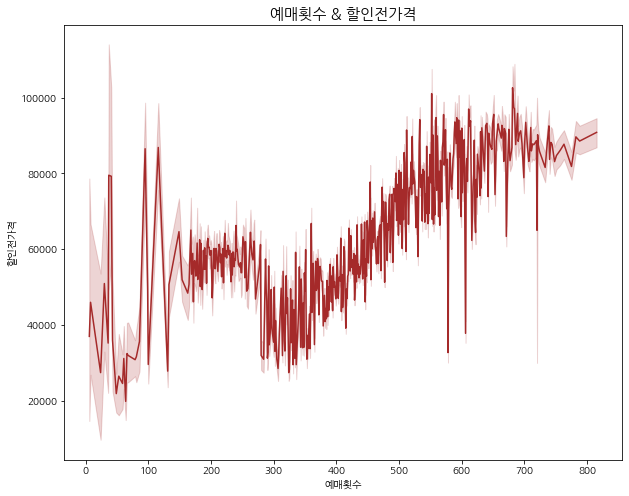

In [52]:
#예매횟수와 할인전가격 관계 선그래프
plt.figure(figsize=(10, 8))
color='brown'
sns.lineplot(concert_nz_df['예매횟수'], concert_nz_df['할인전가격'], color = color)

# 그래프 제목과 축 레이블 설정
plt.title('예매횟수 & 할인전가격', fontsize=15)
plt.xlabel('예매횟수')
plt.ylabel('할인전가격')

# 그래프 표시
plt.show()

## 4. 멤버십요인(회원여부, 충성도)

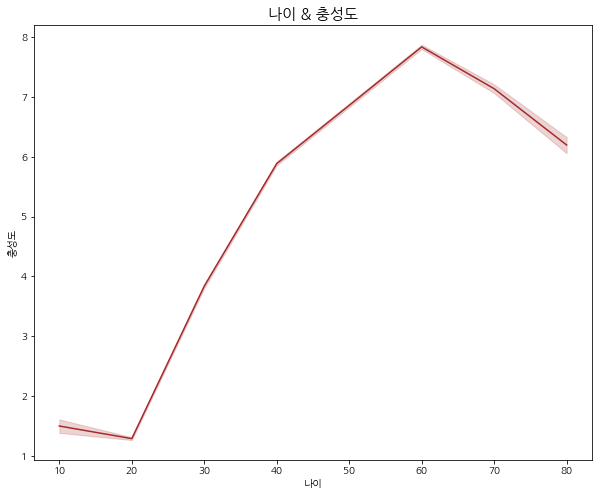

In [53]:
#나이와 충성도 사이의 선그래프
plt.figure(figsize=(10, 8))
color='brown'
sns.lineplot(concert_nz_df['나이'], concert_nz_df['충성도'], color = color)

# 그래프 제목과 축 레이블 설정
plt.title('나이 & 충성도', fontsize=15)
plt.xlabel('나이')
plt.ylabel('충성도')

# 그래프 표시
plt.show()

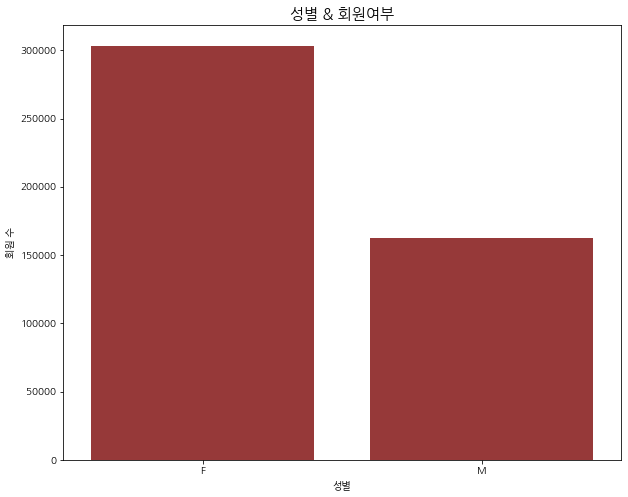

In [54]:
#성별과 회원여부 countplot
plt.figure(figsize=(10, 8))
color='brown'
sns.countplot(data=concert_nz_df[['성별', '회원여부']], x='성별', color = color)

# 그래프 제목과 축 레이블 설정
plt.title('성별 & 회원여부', fontsize=15)
plt.xlabel('성별')
plt.ylabel('회원 수')

# 그래프 표시
plt.show()

## 장르 분석

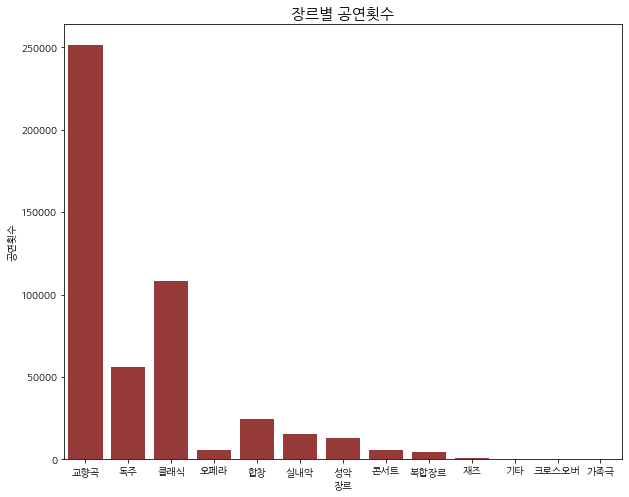

In [55]:
#장르별 공연횟수 막대 그래프
plt.figure(figsize=(10, 8))
color='brown'
sns.countplot(data=concert_nz_df[['장르', '공연명 코드']], x='장르', color = color)

# 그래프 제목과 축 레이블 설정
plt.title('장르별 공연횟수', fontsize=15)
plt.xlabel('장르')
plt.ylabel('공연횟수')

# 그래프 표시
plt.show()

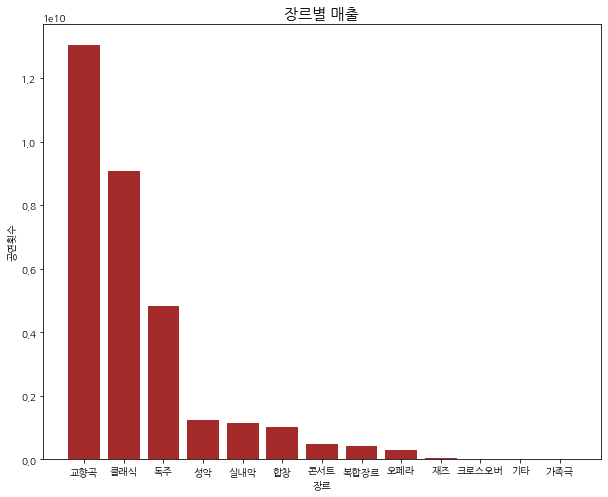

In [56]:
#장르별 매출 막대 그래프
genre_sales = concert_nz_df.groupby('장르')['할인전가격'].sum().sort_values(ascending =False).to_frame()
genre_sales.reset_index(inplace=True)

plt.figure(figsize=(10, 8))
color='brown'
plt.bar(genre_sales['장르'], genre_sales['할인전가격'], color = color)

# 그래프 제목과 축 레이블 설정
plt.title('장르별 매출', fontsize=15)
plt.xlabel('장르')
plt.ylabel('공연횟수')

# 그래프 표시
plt.show()

## 공연명 코드 분석

In [57]:
perf_code_df=concert_nz_df[concert_nz_df['예매취소여부']==0].groupby('공연명 코드')['회원여부'].count().sort_values(ascending = False).to_frame()
perf_code_df.rename(columns={'회원여부':'예매횟수'}, inplace=True)
perf_code_df.head()

,예매횟수
공연명 코드,
834,2460
2822,2210
2538,2113
2824,2049
2830,2045


In [58]:
print(concert_nz_df[concert_nz_df['공연명 코드']==834]['공연날짜'].unique())
print(concert_nz_df[concert_nz_df['공연명 코드']==2822]['공연날짜'].unique())

['2023-02-25T00:00:00.000000000']
['2023-07-01T00:00:00.000000000']


- 가장 많은 예매횟수를 기록한 공연명 코드는 834로 강남심포니오케스트라 제96회 정기연주회 공연이었다. 해당 공연은 유명 지휘자 정치용의 협연이 있는 공연이었다. 
- 두번째로 많은 예매횟수를 기록한 공연명 코드 2822는 루돌프 부흐빈더 베토벤 피아노 소나타 전곡 Ⅲ 공연이었으며, 유명 피아니스트 루돌프 부흐빈더의 내한 공연이었다.
- 유명세가 있는 연주자/지휘자의 공연의 예매율이 높은 것으로 보아, 공연진들의 인지도에 따라 공연의 수요가 크게 차이가 남을 알 수 있다. 

#  III. 모델링

## 1. 모델링 전 전처리

## object형을 int형으로 변환

In [59]:
# 군집화 후 레이블 인코딩된 좌석번호에서 원래의 좌석번호를 찾기 위한 코드 
concert_nz_df['좌석번호_original'] = concert_nz_df['좌석번호']
concert_nz_df1 = concert_nz_df

# int형으로 변환
concert_nz_df1['좌석번호'] = concert_nz_df1['좌석번호'].astype('category').cat.codes
concert_nz_df1['장르'] = concert_nz_df1['장르'].astype('category').cat.codes
concert_nz_df1['시야'] = pd.Categorical(concert_nz_df1['시야'], categories=['R', 'S', 'A', 'B', 'C'], ordered=True)
concert_nz_df1['시야'] = concert_nz_df1['시야'].cat.codes
concert_nz_df1['할인전가격'] = concert_nz_df1['할인전가격'].astype('int64')

## 불필요한 칼럼 제거

In [62]:
X = concert_nz_df1.drop(columns=['나이', '성별', '멤버십유형1', '멤버십유형2', '멤버십유형3', '멤버십유형4', '멤버십유형5',
                      '예매 거래일자', '예매 거래시간', '공연날짜', '할인내역', '선예매시작일', '예매시작일', '공연장소', 
                          '러닝타임', '휴게시간', '회원여부', '최종예매가격', '공연요일', '공연시작시간','충성도','좌석번호_original'])

In [63]:
# 군집화 후 레이블 인코딩된 좌석번호에서 원래의 좌석번호를 찾기 위한 코드
# 원래의 좌석번호와 맵핑 
concert_nz_df['좌석번호'] = concert_nz_df['좌석번호'].astype('category').cat.codes
seat_mapping = dict(zip(concert_nz_df['좌석번호'], concert_nz_df['좌석번호_original']))

## 데이터 프레임 분할

In [64]:
# 주중, 점심
temp1 = (X['주중/주말']==0) & (X['오전/오후']==0)
temp12 = X[temp1]

# 주중, 저녁
temp2 = (X['주중/주말']==0) & (X['오전/오후']==5)
temp22 = X[temp2]

# 주말, 점심
temp3 = (X['주중/주말']==5) & (X['오전/오후']==0)
temp32 = X[temp3]

# 주말, 저녁
temp4 = (X['주중/주말']==5) & (X['오전/오후']==5)
temp42 = X[temp4]

In [65]:
# 군집화에 사용하지 않는 변수 추가 제거 
X1 = temp12.drop(columns=['주중/주말','오전/오후', '할인전가격', '공연명 코드'])
X2 = temp22.drop(columns=['주중/주말','오전/오후', '할인전가격', '공연명 코드'])
X3 = temp32.drop(columns=['주중/주말','오전/오후', '할인전가격', '공연명 코드'])
X4 = temp42.drop(columns=['주중/주말','오전/오후', '할인전가격', '공연명 코드'])

## 2. 군집화

## 주중 & 점심

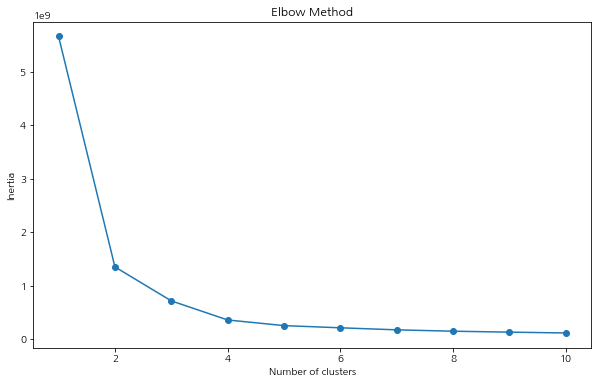

In [66]:
# KMeans 클러스터링
# 클러스터의 수를 결정하기 위해 Elbow 방법을 사용하여 적절한 클러스터의 수를 찾기
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X1)
    inertia_list.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia_list, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [67]:
# 1. 적절한 클러스터 개수 선택
n_clusters = 2

# 2. 선택한 클러스터 개수로 KMeans 클러스터링 실행
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X1)

# 3. 데이터에 클러스터 레이블 할당
temp12['군집'] = kmeans.labels_

In [68]:
# 군집화 결과 시각화 코드
def group_plot(df, g, name_list):

  fig, axes = plt.subplots(g,len(name_list),figsize=(50, 10))
  plt.subplots_adjust(wspace=0.3, hspace = 0.5)

  for i in range(g):
    for num in range(len(name_list)):

      if num != len(name_list)-1 :
        plot1 = sns.countplot(x=name_list[num], data=df.loc[df['군집'] == i], order = df.loc[df['군집'] == i][name_list[num]].value_counts().iloc[:5].index[::-1], ax=axes[i, num]) 
        plot1.set_title(f'군집 : {i}' + ' ' + name_list[num] ,fontsize=15 , weight='bold')
        plot1.set_xlabel(' ')
        plot1.set_ylabel(' ')

      else:
        plot1 = sns.countplot(x=name_list[num], data=df.loc[df['군집'] == i], order = df.loc[df['군집'] == i][name_list[num]].value_counts().iloc[:5].index[::-1], ax=axes[i, num]) 
        plot1.set_title(f'군집 : {i}' + ' ' + name_list[num] ,fontsize=15 , weight='bold')
        plot1.set_xlabel(' ')
        plot1.set_ylabel(' ')
        #plot1.set(xticklabels=[])

  plt.show()

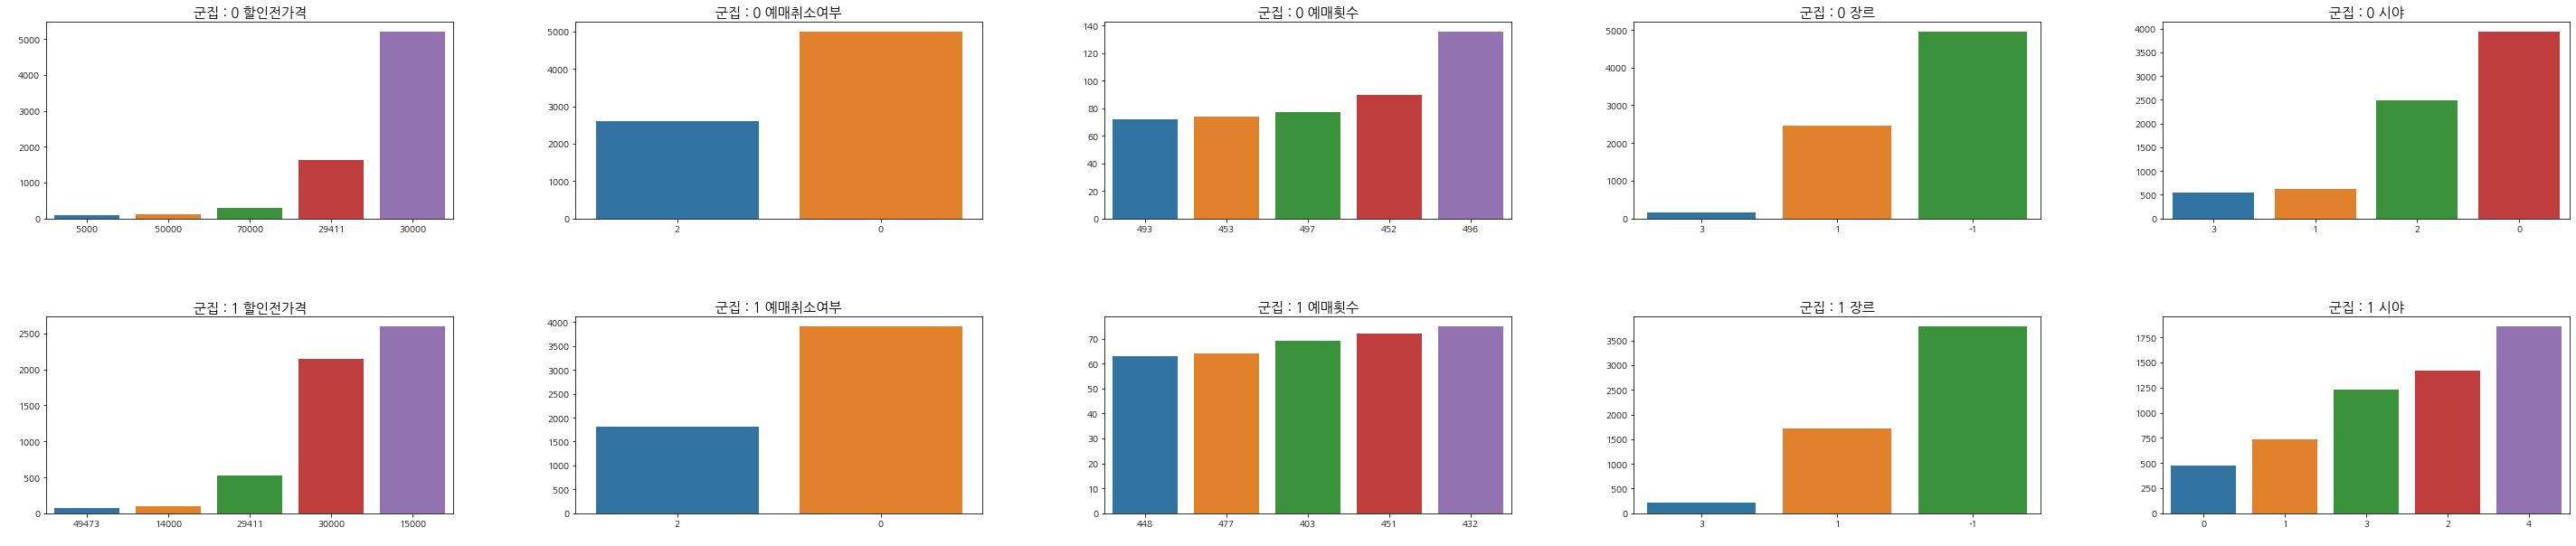

In [69]:
plt.rc('font', family='NanumGothic')
name_list = ['할인전가격','예매취소여부','예매횟수','장르', '시야']
group_plot(temp12, 2, name_list)

## 주중 & 저녁

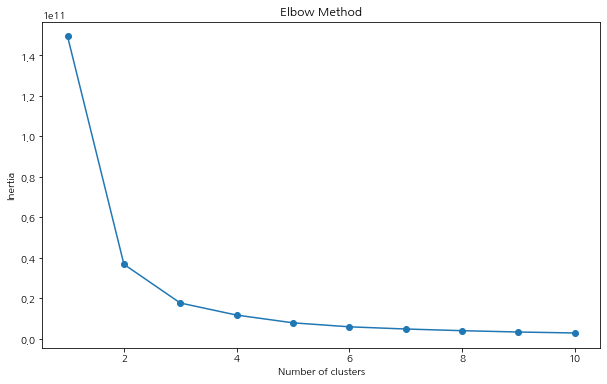

In [70]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X2)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia_list, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [71]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X2)

temp22['군집'] = kmeans.labels_

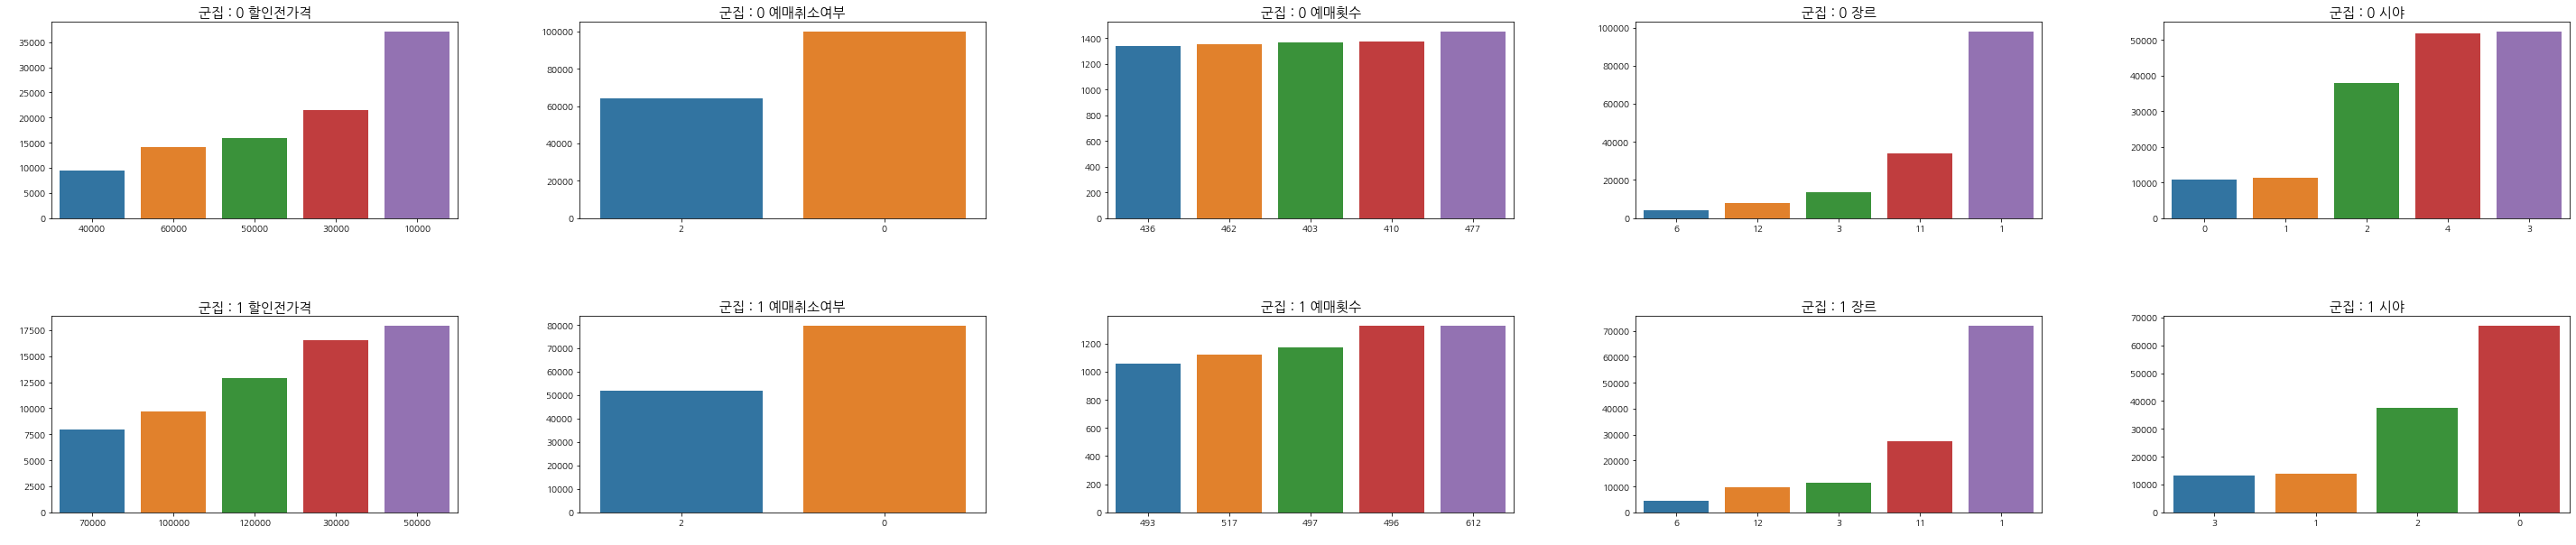

In [72]:
plt.rc('font', family='NanumGothic')
name_list = ['할인전가격','예매취소여부','예매횟수','장르', '시야']
group_plot(temp22, 2, name_list)

## 주말, 점심

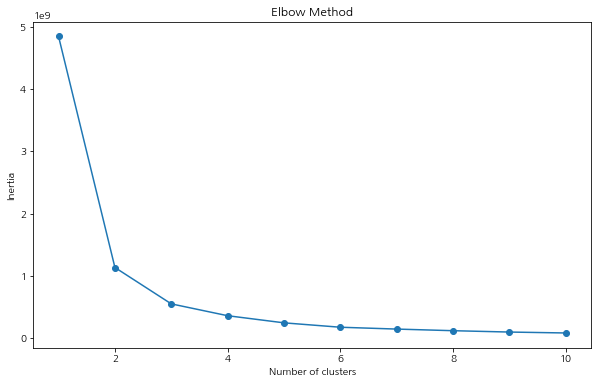

In [73]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X3)
    inertia_list.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia_list, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [74]:
# 1. 적절한 클러스터 개수 선택
n_clusters = 2

# 2. 선택한 클러스터 개수로 KMeans 클러스터링 실행
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X3)

# 3. 데이터에 클러스터 레이블 할당
temp32['군집'] = kmeans.labels_

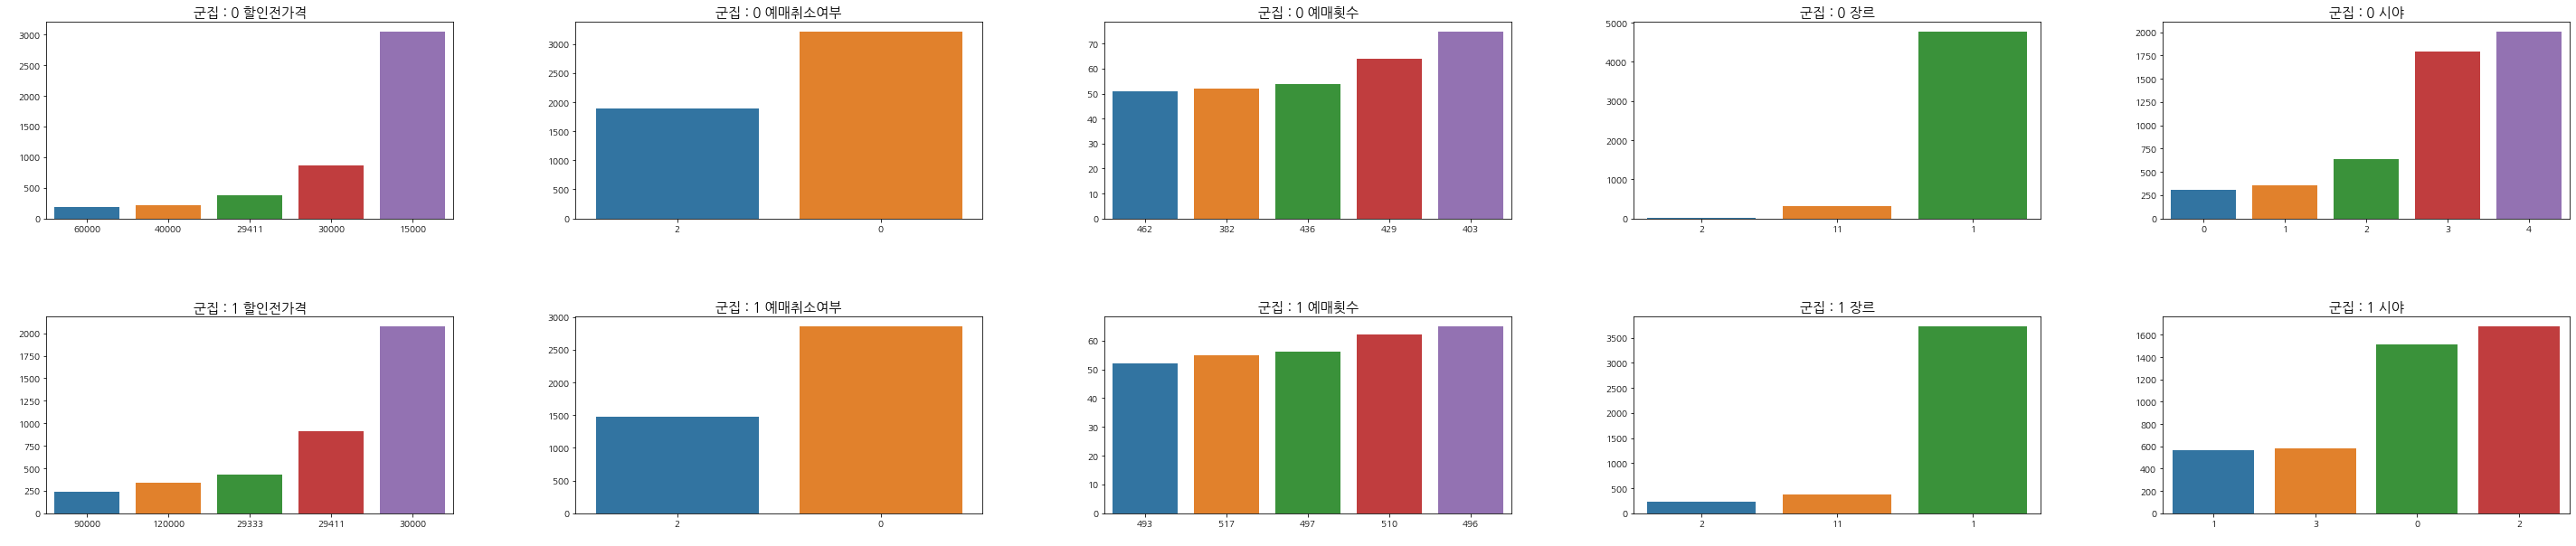

In [75]:
plt.rc('font', family='NanumGothic')
name_list = ['할인전가격','예매취소여부','예매횟수','장르', '시야']
group_plot(temp32, 2, name_list)

## 주말, 저녁

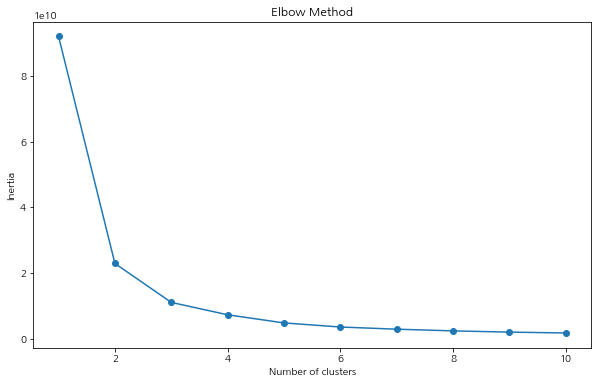

In [76]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X4)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia_list, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [77]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X4)

temp42['군집'] = kmeans.labels_

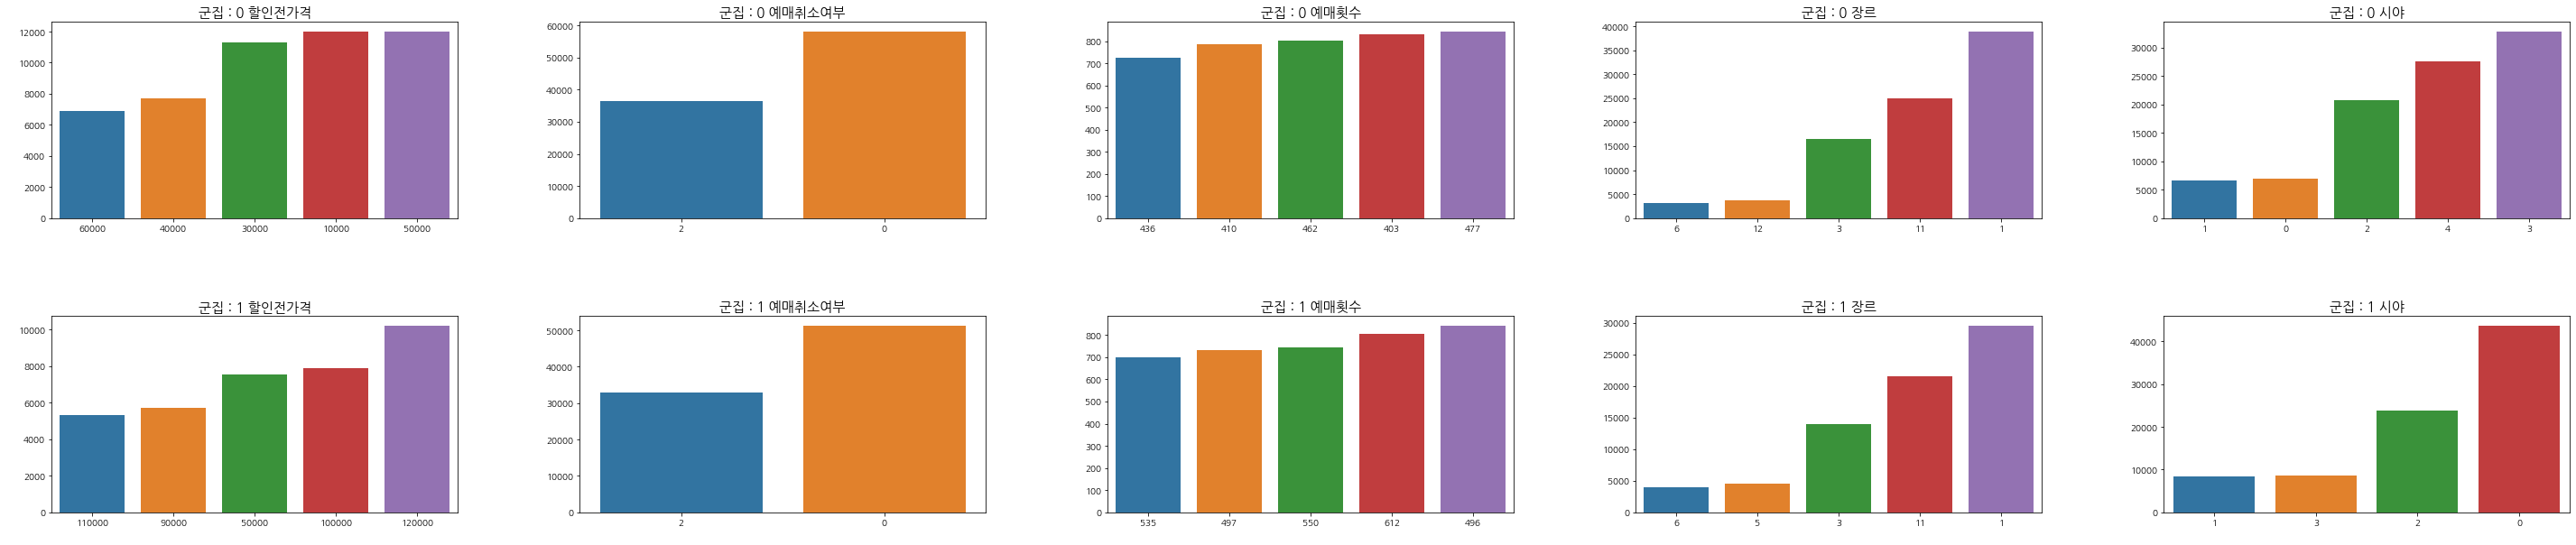

In [78]:
plt.rc('font', family='NanumGothic')
name_list = ['할인전가격','예매취소여부','예매횟수','장르', '시야']
group_plot(temp42, 2, name_list)

# IV. 가격 산출

## 1. 군집별 할인 전 가격의 평균 도출
- 주중 & 점심

In [79]:
temp12.groupby('군집')['할인전가격'].describe() # 33000 / 24000 원

,count,mean,std,min,25%,50%,75%,max
군집,,,,,,,,
0,7599.000,32849.224,11882.717,5000.000,30000.000,30000.000,30000.000,90000.000
1,5723.000,23842.340,10577.080,5000.000,15000.000,29411.000,30000.000,90000.000


## 2. 총 예산 도출
- 취소가 되지 않은 예매 데이터에서 '할인 전 가격'의 총합

In [80]:
temp_12 = temp12[temp12['예매취소여부']==0]

In [81]:
temp_12['할인전가격'].sum()

257757630

## 3. 군집별 가격 산출
- 총 예산 X (군집별 평균값 비율) / 군집의 행 개수

In [82]:
# 군집 0 -> 30000원
temp_12['할인전가격'].sum() * (33000/57000) / len(temp_12[temp_12['군집']==0])

29797.943606019842

In [83]:
# 군집 1 -> 28000원
temp_12['할인전가격'].sum() * (24000/57000) / len(temp_12[temp_12['군집']==1])

27721.463198225447

## 나머지 분류에 대해서 과정 반복
- 주중 & 저녁

In [84]:
temp22.groupby('군집')['할인전가격'].describe() # 51000원 / 81000 원

,count,mean,std,min,25%,50%,75%,max
군집,,,,,,,,
0,164540.000,51489.266,41644.170,1000.000,20000.000,40000.000,70000.000,200000.000
1,131710.000,80807.689,48625.438,1000.000,40000.000,70000.000,120000.000,200000.000


In [85]:
temp_22 = temp22[temp22['예매취소여부']==0]

In [86]:
# 군집 0 -> 42000원
temp_22['할인전가격'].sum() * (51000/132000) / len(temp_22[temp_22['군집']==0])

42182.26660558282

In [87]:
# 군집 1 -> 84000원
temp_22['할인전가격'].sum() * (81000/132000) / len(temp_22[temp_22['군집']==1])

84205.31409467754

- 주말 & 점심

In [88]:
temp32.groupby('군집')['할인전가격'].describe() # 24000원 / 41000 원

,count,mean,std,min,25%,50%,75%,max
군집,,,,,,,,
0,5108.000,24318.926,17183.051,3000.000,15000.000,15000.000,30000.000,120000.000
1,4340.000,41230.026,27333.040,15000.000,29411.000,30000.000,30000.000,120000.000


In [89]:
temp_32 = temp32[temp32['예매취소여부']==0]

In [90]:
# 군집 0 -> 23000원
temp_32['할인전가격'].sum() * (24000/65000) / len(temp_32[temp_32['군집']==0])

22633.829302892078

In [91]:
# 군집 1 -> 44000원
temp_32['할인전가격'].sum() * (41000/65000) / len(temp_32[temp_32['군집']==1])

43516.27841208407

- 주말 & 저녁

In [92]:
temp42.groupby('군집')['할인전가격'].describe() # 52000 / 88000 원

,count,mean,std,min,25%,50%,75%,max
군집,,,,,,,,
0,94765.000,52278.399,33349.665,1000.000,30000.000,50000.000,70000.000,200000.000
1,84297.000,87681.538,42858.064,3000.000,50000.000,90000.000,120000.000,200000.000


In [93]:
temp_42 = temp42[temp42['예매취소여부']==0]

In [94]:
# 군집 0 -> 47000원
temp_42['할인전가격'].sum() * (52000/140000) / len(temp_42[temp_42['군집']==0])

46841.79117806539

In [95]:
# 군집 1 -> 90000원
temp_42['할인전가격'].sum() * (88000/140000) / len(temp_42[temp_42['군집']==1])

89894.39618372434

## 같은 좌석번호 당 할당된 군집의 종류 개수 확인

- 주중 & 점심

In [96]:
# 같은 좌석번호에서 여러 군집이 등장하는 지 확인
# 좌석번호에 따른 군집의 고유한 값의 개수를 계산
grouped = temp12.groupby('좌석번호')['군집'].nunique()

# 군집의 종류가 2개 이상인 좌석번호를 찾기
duplicated_seats = grouped[grouped > 1]

duplicated_seats

Series([], Name: 군집, dtype: int64)

- 주중 & 저녁

In [97]:
# 좌석번호에 따른 군집의 고유한 값의 개수를 계산
grouped = temp22.groupby('좌석번호')['군집'].nunique()

# 군집의 종류가 2개 이상인 좌석번호를 찾기
duplicated_seats = grouped[grouped > 1]

duplicated_seats

Series([], Name: 군집, dtype: int64)

- 주말 & 점심

In [98]:
# 좌석번호에 따른 군집의 고유한 값의 개수를 계산
grouped = temp32.groupby('좌석번호')['군집'].nunique()

# 군집의 종류가 2개 이상인 좌석번호를 찾기
duplicated_seats = grouped[grouped > 1]

duplicated_seats

Series([], Name: 군집, dtype: int64)

- 주말 & 저녁

In [99]:
# 좌석번호에 따른 군집의 고유한 값의 개수를 계산
grouped = temp42.groupby('좌석번호')['군집'].nunique()

# 군집의 종류가 2개 이상인 좌석번호를 찾기
duplicated_seats = grouped[grouped > 1]

duplicated_seats # 4개의 데이터프레임에서 좌석번호 별 군집이 하나의 고유한 값을 갖는 것을 확인 

Series([], Name: 군집, dtype: int64)

## 군집별 좌석 목록 저장

In [100]:
# 주중, 점심
temp12['좌석 번호'] = temp12['좌석번호'].map(seat_mapping)
temp12_final = temp12[['좌석 번호','군집']]
temp12_final.to_csv('주중점심군집.csv', index=False)

In [101]:
# 주중, 저녁
temp22['좌석 번호'] = temp22['좌석번호'].map(seat_mapping)
temp22_final = temp22[['좌석 번호','군집']]
temp22_final.to_csv('주중저녁군집.csv', index=False)

In [102]:
# 주말, 점심
temp32['좌석 번호'] = temp32['좌석번호'].map(seat_mapping)
temp32_final = temp32[['좌석 번호','군집']]
temp32_final.to_csv('주말점심군집.csv', index=False)

In [103]:
# 주말, 저녁
temp42['좌석 번호'] = temp42['좌석번호'].map(seat_mapping)
temp42_final = temp42[['좌석 번호','군집']]
temp42_final.to_csv('주말저녁군집.csv', index=False)